In [ ]:
# hovmoeller plot for smp profiles

In [1]:
%matplotlib notebook
import snowmicropyn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import glob
from os import *
import datetime

In [2]:
smp_data_files = sorted(glob.glob("./sodankylae_smpNVR/*derivatives.csv"))
smp_df = pd.read_excel('./sodankylae-smp_locationsFilenames.xlsx')
smp_df

filename  plot           plot_name trench    snowpit  \
0    S29M1241_samples.csv     1                 Bog    NaN        NaN   
1    S29M1242_samples.csv     1                 Bog    NaN        NaN   
2    S29M1243_samples.csv     1                 Bog    NaN        NaN   
3    S29M1244_samples.csv     1                 Bog    NaN        NaN   
4    S29M1245_samples.csv     1                 Bog    NaN        NaN   
5    S29M1246_samples.csv     1                 Bog    NaN        NaN   
6    S29M1247_samples.csv     1                 Bog    NaN        NaN   
7    S29M1248_samples.csv     1                 Bog    NaN        NaN   
8    S29M1249_samples.csv     1                 Bog    NaN  snowpit 2   
9    S29M1250_samples.csv     1                 Bog    NaN  snowpit 2   
10   S29M1251_samples.csv     1                 Bog    NaN        NaN   
11   S29M1252_samples.csv     1                 Bog    NaN        NaN   
12   S29M1253_samples.csv     1                 Bog    NaN        NaN   
13   S29M1254_samples.csv     1                 Bog    NaN        NaN   
14   S29M1255_samples.csv     1                 Bog    NaN        NaN   
15   S29M1256_samples.csv     1                 Bog    NaN        NaN   
16   S29M1257_samples.csv     1                 Bog    NaN        NaN   
17   S29M1258_samples.csv     1                 Bog    NaN        NaN   
18   S29M1259_samples.csv     1                 Bog    NaN        NaN   
19   S29M1260_samples.csv     1                 Bog    NaN        NaN   
20   S29M1261_samples.csv     1                 Bog    NaN        NaN   
21   S29M1262_samples.csv     1                 Bog    NaN  snowpit 1   
22   S29M1263_samples.csv     1                 Bog    NaN  snowpit 1   
23   S29M1264_samples.csv     1                 Bog    NaN        NaN   
24   S29M1265_samples.csv     1                 Bog    NaN        NaN   
25   S29M1266_samples.csv     1                 Bog    NaN        NaN   
26   S29M1267_samples.csv     1                 Bog    NaN        NaN   
27   S29M1270_samples.csv     2  Forest opening IOA    NaN        NaN   
28   S29M1271_samples.csv     2  Forest opening IOA    NaN        NaN   
29   S29M1272_samples.csv     2  Forest opening IOA    NaN        NaN   
..                    ...   ...                 ...    ...        ...   
75   S29M1320_samples.csv     3        Antenna plot    NaN  snowpit 1   
76   S29M1321_samples.csv     3        Antenna plot    NaN        NaN   
77   S29M1322_samples.csv     3        Antenna plot    NaN        NaN   
78   S29M1323_samples.csv     3        Antenna plot    NaN        NaN   
79   S29M1324_samples.csv     3        Antenna plot    NaN        NaN   
80   S29M1325_samples.csv     3        Antenna plot    NaN        NaN   
81   S29M1326_samples.csv     3        Antenna plot    NaN        NaN   
82   S29M1327_samples.csv     3        Antenna plot    NaN        NaN   
83   S29M1328_samples.csv     3        Antenna plot    NaN        NaN   
84   S29M1329_samples.csv     3        Antenna plot    NaN        NaN   
85   S29M1330_samples.csv     3        Antenna plot    NaN        NaN   
86   S29M1331_samples.csv     3        Antenna plot    NaN        NaN   
87   S29M1332_samples.csv     3        Antenna plot    NaN        NaN   
88   S29M1333_samples.csv     3        Antenna plot    NaN        NaN   
89   S29M1334_samples.csv     3        Antenna plot    NaN        NaN   
90   S29M1335_samples.csv     3        Antenna plot    NaN        NaN   
91   S29M1336_samples.csv     3        Antenna plot    NaN        NaN   
92   S29M1337_samples.csv     3        Antenna plot    NaN        NaN   
93   S29M1338_samples.csv     3        Antenna plot    NaN        NaN   
94   S29M1339_samples.csv     3        Antenna plot    yes        NaN   
95   S29M1340_samples.csv     3        Antenna plot    yes        NaN   
96   S29M1341_samples.csv     3        Antenna plot    yes        NaN   
97   S29M1342_samples.csv     3        Antenna plot    yes        NaN   
98

<IPython.core.display.Javascript object>


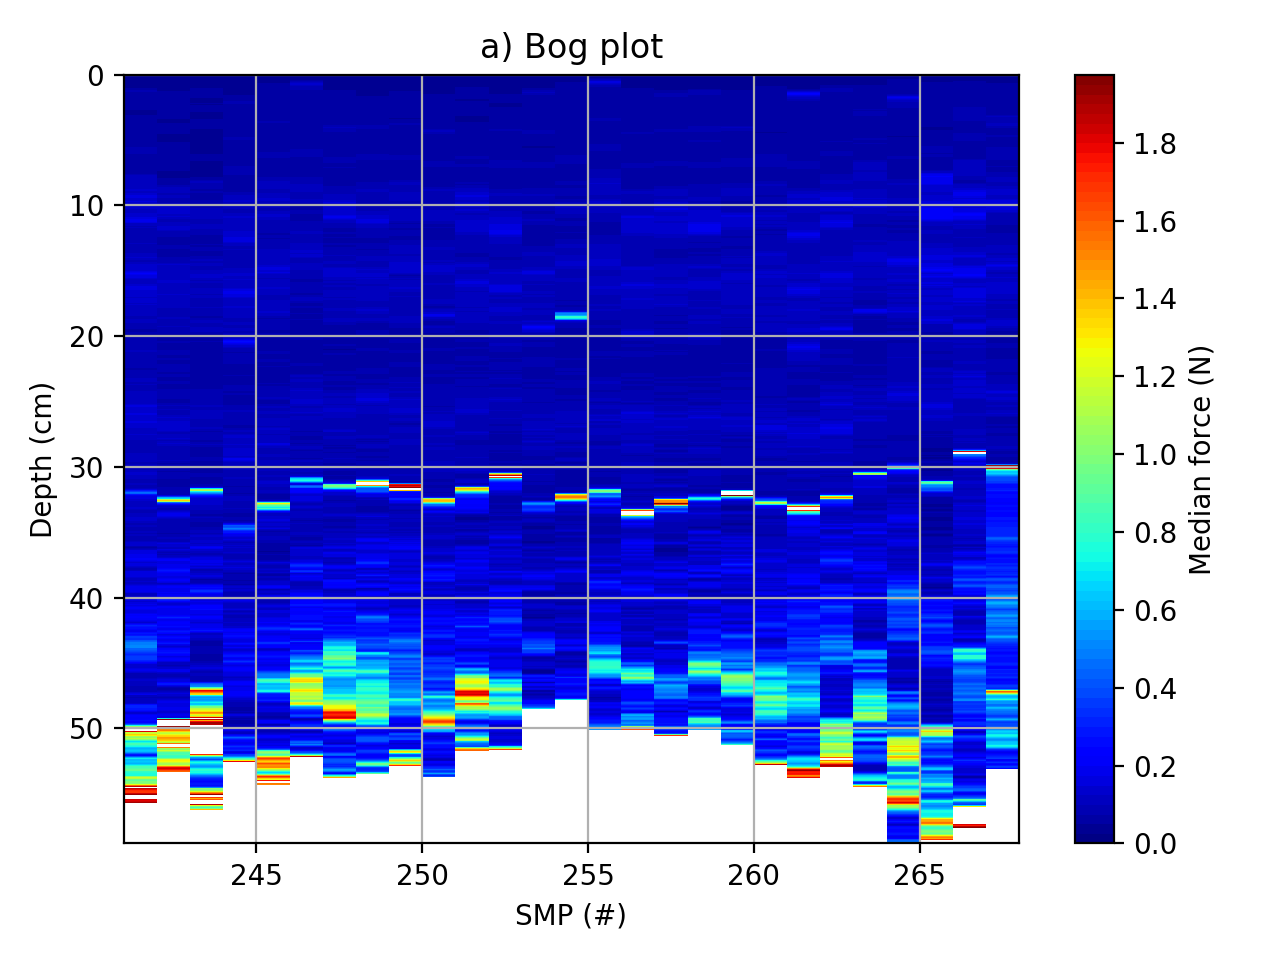

In [3]:
#Based on an original from H. Löwe (see evaluate.ipynb, evaluate_smpOLD.ipynb)
distance_between_smp = 1
#day 1: bog plot 1241-1267 [27/0]; pit2(10:30) => 1249, 1250; pit1(11:25)=> 1262, 1263
#day 2: forestOpening plot 1270-1300 [31/3]; pit2(10:30) => 1279, 1280; pit1(13:15)=> 1292
#day : antenna plot IOA 1303-1349 [47/3]; pit1(11:00) => 1319, 1320
day_id = 1


for index,row in smp_df.iterrows():
    if (row['plot'] == day_id):
        fn = "./sodankylae_smpNVR/" + row['filename'][0:9] + "derivatives_niViz.csv"
        df = pd.read_csv(fn, header=0, skiprows=3)
        Y = df['force_median (N)']
        z = df[';distance (cm)']
        contour_levels = np.arange( 0, 2, 0.025)
        #contour_levels = np.arange( 0, 3, 0.01)
        i = index
        i0 = 241 + (day_id-1)*(3 - 1)
        x1 = i0 + i * distance_between_smp
        x2 = i0 + (i+1) * distance_between_smp
        plt.contourf([x1, x2], z, np.array([Y,Y]).transpose(), levels=contour_levels, cmap='jet')

if (day_id == 1):
        plt.title('a) Bog plot')
elif (day_id == 2):
        plt.title('a) Forest plot')
else:
        plt.title('a) Antenna plot')

#axs.Axes.set_ylim(0,bottom=100,top=0)
plt.xlabel('SMP (#)')
plt.ylabel('Depth (cm)')
plt.gca().invert_yaxis()
plt.tight_layout()
cbar = plt.colorbar()
cbar.set_label('Median force (N)', rotation=90)
plt.grid()
if (day_id == 1):
        imagefilename = "./bogPlot.png"
elif (day_id == 2):
        imagefilename = "./forestPlot.png"
else:
        imagefilename = "./antennaPlot.png"
plt.savefig(imagefilename)

In [6]:
fn = "./sodankylae_smpPYN" + "S29M1313_" + "derivatives.csv"
df1 = pd.read_csv(fn)
df1[' force_median [N]'] 

FileNotFoundError: [Errno 2] File b'./sodankylae_smp/sodankylae_smpNS29M1313_derivatives.csv' does not exist: b'./sodankylae_smp/sodankylae_smpNS29M1313_derivatives.csv'

In [32]:
fn = "./sodankylae_smpNVR" + "S29M1265_" + "derivatives_niViz.csv"
df2 = pd.read_csv(fn, header=0, skiprows=3)
df2['force_median (N)']

FileNotFoundError: [Errno 2] File b'./sodankylae_smpNVRS29M1265_derivatives_niViz.csv' does not exist: b'./sodankylae_smpNVRS29M1265_derivatives_niViz.csv'